# Activity 1.1 : Introduction to Machine Learning 

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements. 

Import the libraries and the dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('Iris_Data.csv')
#check the content of the dataframe
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Determine the following:
* The number of data points (rows). 
* The column names. 
* The data types for each column. 

In [2]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [3]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Determine the following:
* The number of each species present. 
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [4]:
stas_df = data.describe()
print(stas_df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000

Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [6]:
# The mean calculation
data.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [7]:
# The median calculation
data.groupby('species').median()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

In [8]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

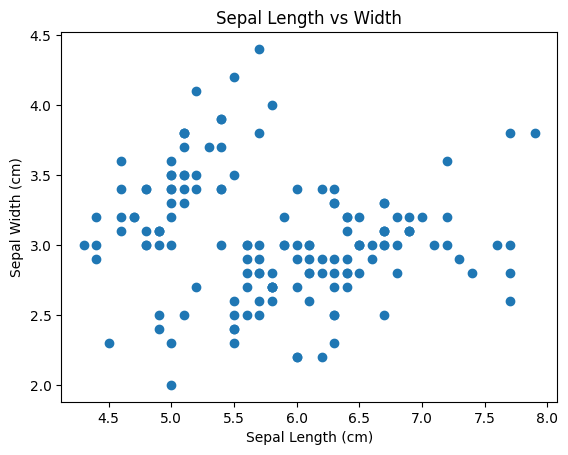

In [9]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot. 

- as the graph represents the Sepal length as the independent variable and its width as its dependent. This plot simply says that the length and width of a Iris' Sepals are not strongly correlated to each other. They are not closely related since we can't say "If the sepal is long, it is wide" or vice versa.

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

- Histograms are use to classify the frequency of a certain data point or group in the data sets, Can be use to check out the "majority" of the data you will handle

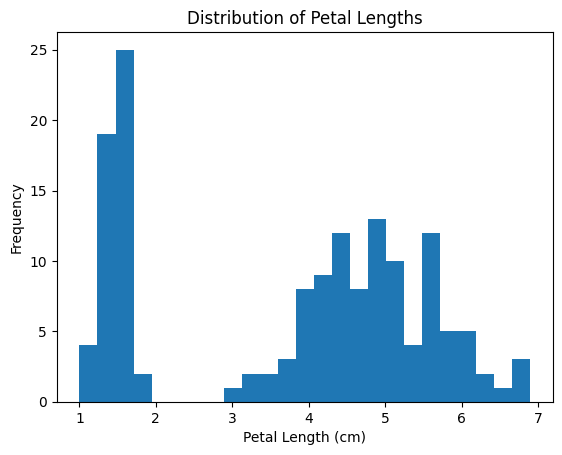

In [10]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot? 

- Boxplot are used to graphically displays different parameters in simple way such as mean, median, quartiles and some view in available outliers. It also shows the distribution of the of the data.

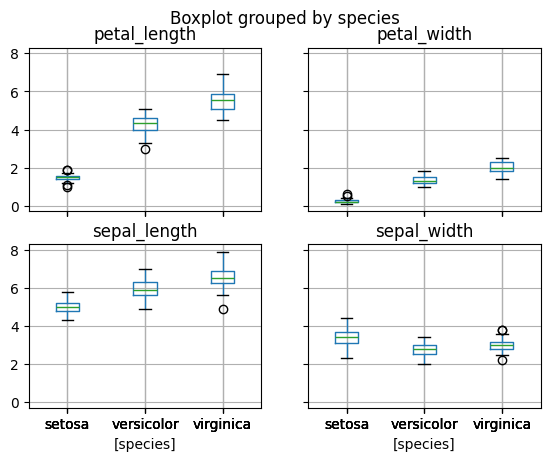

In [11]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

In [12]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

species   measurement  size
0  setosa  sepal_length   5.1
1  setosa   sepal_width   3.5
2  setosa  petal_length   1.4
3  setosa   petal_width   0.2
4  setosa  sepal_length   4.9

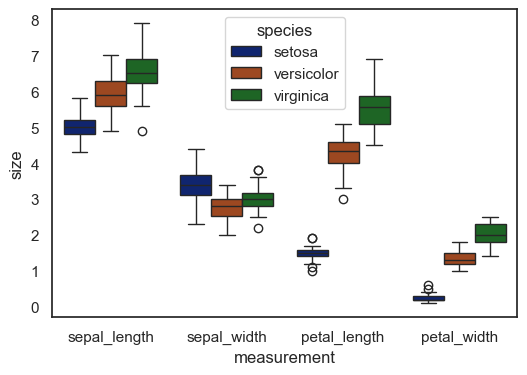

In [13]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements. 

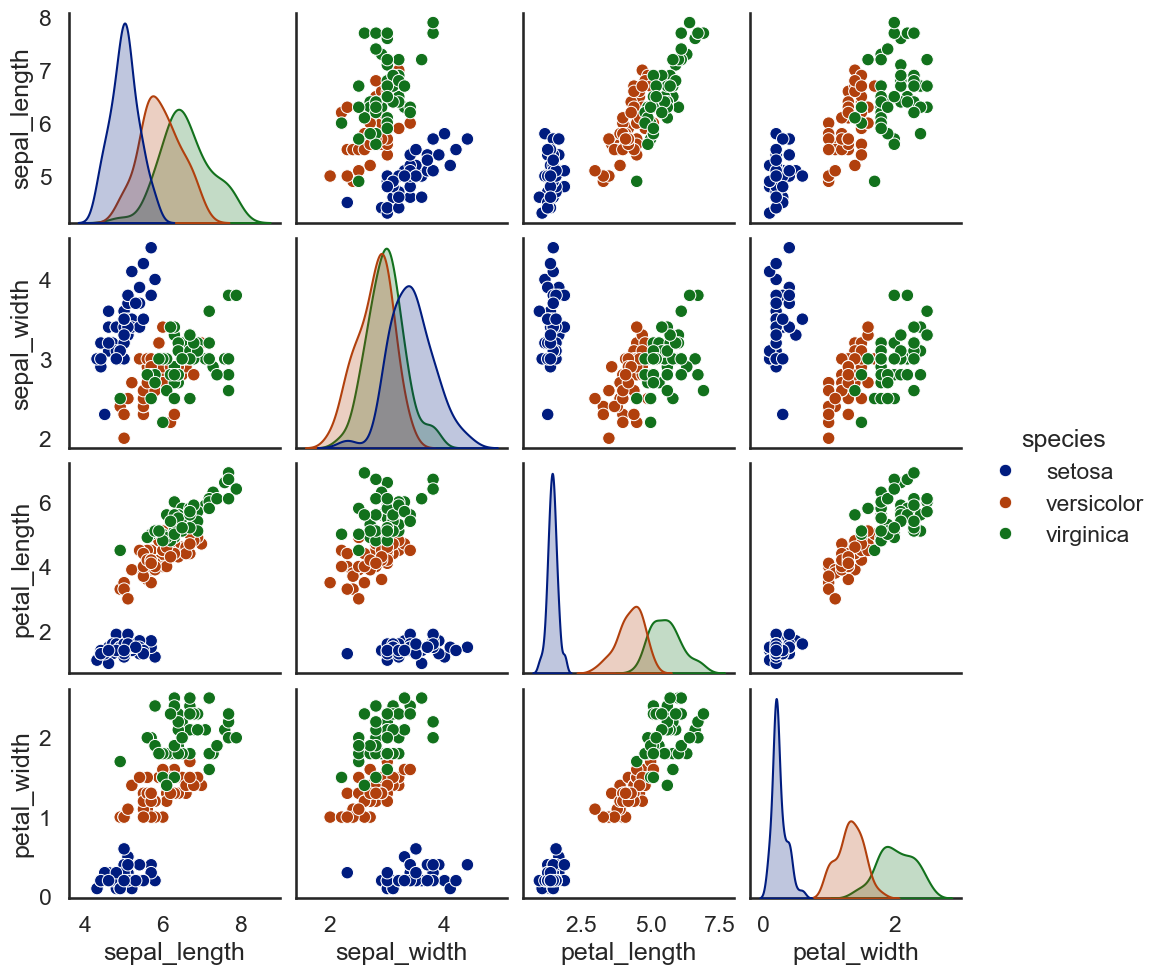

In [14]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');

Interpret the result of correlation using the pairplot

- This shows the setosa target has an identifiable trait in evry features (to sepal and petal lenght and width). This also shows that petal width and lenght can be an optimal features for a classification model.

Supplementary Activity:
* Choose your own dataset
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

### Dataset in this activity:
- Faulty Steel Plates (Kaggle):
  - https://www.kaggle.com/datasets/uciml/faulty-steel-plates

In [15]:
# type your code here 
pd.options.display.max_columns = None
fdf = pd.read_csv("faults.csv")
fdf.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0             0.8182           -0.2913          0.5822       1          0   
1             0.7931           -0.1756          0.2984       1          0   
2             0.6667           -0.1228          0.2150       1          0   
3             0.8444           -0.1568          0.5212       1          0   
4             0.9338           -0.1992          1.0000       1          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       0          0      0             0  
1         0       0          0      0             0  
2         0       0          0      0             0  
3         0       0          0      0             0  
4         0       0          0      0             0

Let's check what this dataset gives...

In [16]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

This data has so many features as said in the kaggle context page. There are 27 features and 7 targets
that totals for 34 fields. Info() also suggest that the dataset we will handle doesn't have null data,
which make data wrangling an ease

For now my goal is to minimize this data to much lesser fields as soon as possible

- i'm not a professional in terms of steels but based in a quick google search (Zamet, 2019), 
- A300 Steel plates are "high mechanical and corrosion resistance which are maintained even at rather high temperatures."
- and A400 Steel plates are specifically designed for abrasion and wear-resistant applications.
  ( https://zamet.it/en/Austenitic-Steel-A300/p/52  & https://www.zamet.it/en/A400-series-Ferritic-Stainless-Steels/p/54) 

In [17]:
# This two features consumes two fields in the dataset, let's combine them
fdf[["TypeOfSteel_A300","TypeOfSteel_A400"]]

TypeOfSteel_A300  TypeOfSteel_A400
0                    1                 0
1                    1                 0
2                    1                 0
3                    0                 1
4                    0                 1
...                ...               ...
1936                 0                 1
1937                 0                 1
1938                 0                 1
1939                 0                 1
1940                 1                 0

[1941 rows x 2 columns]

In [18]:
for i in ["TypeOfSteel_A300", "TypeOfSteel_A400"]:
    fdf.loc[fdf[i] == 1,"TypeOfSteel"] = i.replace("TypeOfSteel_","")
    # If the Condition is true then it will proceed to apply its name to the new field
    fdf.drop(i,inplace=True,axis=1) # Removes the Column after
fdf["TypeOfSteel"]

0       A300
1       A300
2       A300
3       A400
4       A400
        ... 
1936    A400
1937    A400
1938    A400
1939    A400
1940    A300
Name: TypeOfSteel, Length: 1941, dtype: object

well also the problem in data set with many fields are the difficulty to identify to connection of each
of them as well as the context page doesn't elaborate how these datas select into such, thats why lets check it out

In [19]:
# lets Save first the targets to a different dataframe
targets = fdf.loc[:,[
    'Pastry',
    'Z_Scratch',
    'K_Scatch',
    'Stains',
    'Dirtiness',
    'Bumps',
    'Other_Faults',
    'TypeOfSteel'
]]
targets

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  \
0          1          0         0       0          0      0             0   
1          1          0         0       0          0      0             0   
2          1          0         0       0          0      0             0   
3          1          0         0       0          0      0             0   
4          1          0         0       0          0      0             0   
...      ...        ...       ...     ...        ...    ...           ...   
1936       0          0         0       0          0      0             1   
1937       0          0         0       0          0      0             1   
1938       0          0         0       0          0      0             1   
1939       0          0         0       0          0      0             1   
1940       0          0         0       0          0      0             1   

     TypeOfSteel  
0           A300  
1           A300  
2           A300  
3           A400  
4           A400  
...          ...  
1936        A400  
1937        A400  
1938        A400  
1939        A400  
1940        A300  

[1941 rows x 8 columns]

In [20]:
# and remove them to the data frame
fdf.drop(['Pastry',
    'Z_Scratch',
    'K_Scatch',
    'Stains',
    'Dirtiness',
    'Bumps',
    'Other_Faults',
    'TypeOfSteel'], axis=1, inplace=True)
fdf

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0              44              24220                     76   
1              30              11397                     84   
2              19               7972                     99   
3              45              18996                     99   
4             260             246930                     37   
...           ...                ...                    ...   
1936           22              35033                    119   
1937           24              34599                    112   
1938           22              37572                    120   
1939           47              52715                    117   
1940           22              11682                    101   

      Maximum_of_Luminosity  Length_of_Conveyer  Steel_Plate_Thickness  \
0                       108                1687                     80   
1                       123                1687                     80   
2                       125                1623                    100   
3                       126                1353                    290   
4                       126                1353                    185   
...                     ...                 ...                    ...   
1936                    141                1360                     40   
1937                    133                1360                     40   
1938                    140                1360                     40   
1939                    140                1360                     40   
1940                    133                1360                     80   

      Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  \
0          0.0498       0.2415        0.1818           0.0047         0.4706   
1          0.7647       0.3793        0.2069           0.0036         0.6000   
2          0.9710       0.3426        0.3333           0.0037         0.7500   
3          0.7287       0.4413        0.1556           0.0052         0.5385   
4          0.0695       0.4486        0.0662           0.0126         0.2833   
...           ...          ...           ...              ...            ...   
1936       0.3662       0.3906        0.5714           0.0206         0.5185   
1937       0.2118       0.4554        0.5484           0.0228         0.7046   
1938       0.2132       0.3287        0.5172           0.0213         0.7250   
1939       0.2015       0.5904        0.9394           0.0243         0.3402   
1940       0.1162       0.6781        0.8000           0.0147         0.7692   

      Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0            1.0000                   1.0      2.4265       0.9031   
1            0.9667                   1.0      2.0334       0.7782   
2            0.9474                   1.0      1.8513       0.7782   
3            1.0000                   1.0      2.2455       0.8451   
4            0.9885                   1.0      3.3818       1.2305   
...             ...           

In [21]:
# lets take a sample of the data 
fdf.tail(3)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
1938           22              37572                    120   
1939           47              52715                    117   
1940           22              11682                    101   

      Maximum_of_Luminosity  Length_of_Conveyer  Steel_Plate_Thickness  \
1938                    140                1360                     40   
1939                    140                1360                     40   
1940                    133                1360                     80   

      Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  \
1938       0.2132       0.3287        0.5172           0.0213         0.7250   
1939       0.2015       0.5904        0.9394           0.0243         0.3402   
1940       0.1162       0.6781        0.8000           0.0147         0.7692   

      Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
1938         0.6818                   0.0      2.4654       1.4624   
1939         0.6596                   0.0      2.6222       1.5185   
1940         0.7273                   0.0      2.0128       1.3010   

      Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
1938       1.1761            -0.4828            0.0052          0.7079  
1939       1.4914            -0.0606           -0.0171          0.9919  
1940       1.2041            -0.2000           -0.1139          0.5296

In [22]:
targets.tail(3)

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  \
1938       0          0         0       0          0      0             1   
1939       0          0         0       0          0      0             1   
1940       0          0         0       0          0      0             1   

     TypeOfSteel  
1938        A400  
1939        A400  
1940        A300

In this part, Im not sure about this 'Other_Faults' field since it signifies and makes the data irrelevant
because "Other_faults" can be so vague and I think it can bring problems in the model in the future so might as well
to remove it

In [23]:
# Remove this Column
targets.drop("Other_Faults", axis=1, inplace=True)

Now lets see how they react in each target but first, lets dissect each of the features to categories. (Since context page doesn't give enough context to the features, I've done some research and proceed to these)

In [24]:
# Location of faults
locationf = fdf.loc[:,['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum']]

# Size of faults
sizef = fdf.loc[:,['Pixels_Areas','X_Perimeter','Y_Perimeter']]

# Lumminosity of faults
lightf = fdf.loc[:,['Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity']]

# features of the Steel plate
features = fdf.loc[:,['Steel_Plate_Thickness',
                    'Edges_Index',
                    'Empty_Index',
                    'Square_Index',
                    'Outside_X_Index',
                    'Edges_X_Index',
                    'Edges_Y_Index',
                    'Outside_Global_Index']]

# logarithmic datas
logarithmic = fdf.loc[:,['LogOfAreas','Log_X_Index','Log_Y_Index']]

# Other Datas
others = fdf.loc[:,['Orientation_Index','Luminosity_Index','SigmoidOfAreas']]

Why I do this? it is very slow to process this data in a whole bulk, and I want to check every single reaction of targets
to these categories of the feature

# Categorized Features

In [25]:
# Location stats
location_stats = locationf.describe()
location_stats.iloc[1:] # 

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum
mean   571.136012   617.964451  1.650685e+06  1.650739e+06
std    520.690671   497.627410  1.774578e+06  1.774590e+06
min      0.000000     4.000000  6.712000e+03  6.724000e+03
25%     51.000000   192.000000  4.712530e+05  4.712810e+05
50%    435.000000   467.000000  1.204128e+06  1.204136e+06
75%   1053.000000  1072.000000  2.183073e+06  2.183084e+06
max   1705.000000  1713.000000  1.298766e+07  1.298769e+07

In [26]:
# size stats
sizef_stats = sizef.describe()
sizef_stats.iloc[1:] # 

Pixels_Areas   X_Perimeter   Y_Perimeter
mean    1893.878413    111.855229     82.965997
std     5168.459560    301.209187    426.482879
min        2.000000      2.000000      1.000000
25%       84.000000     15.000000     13.000000
50%      174.000000     26.000000     25.000000
75%      822.000000     84.000000     83.000000
max   152655.000000  10449.000000  18152.000000

In [27]:
# Luminosity stats
lightf_stats = lightf.describe()
lightf_stats.iloc[1:] # 

Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity
mean       2.063121e+05              84.548686             130.193715
std        5.122936e+05              32.134276              18.690992
min        2.500000e+02               0.000000              37.000000
25%        9.522000e+03              63.000000             124.000000
50%        1.920200e+04              90.000000             127.000000
75%        8.301100e+04             106.000000             140.000000
max        1.159141e+07             203.000000             253.000000

In [28]:
# Features stats
features_stats = features.describe()
features_stats.iloc[1:] # SigmoidOfAreas

Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  \
mean              78.737764     0.331715     0.414203      0.570767   
std               55.086032     0.299712     0.137261      0.271058   
min               40.000000     0.000000     0.000000      0.008300   
25%               40.000000     0.060400     0.315800      0.361300   
50%               70.000000     0.227300     0.412100      0.555600   
75%               80.000000     0.573800     0.501600      0.818200   
max              300.000000     0.995200     0.943900      1.000000   

      Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  
mean         0.033361       0.610529       0.813472              0.575734  
std          0.058961       0.243277       0.234274              0.482352  
min          0.001500       0.014400       0.048400              0.000000  
25%          0.006600       0.411800       0.596800              0.000000  
50%          0.010100       0.636400       0.947400              1.000000  
75%          0.023500       0.800000       1.000000              1.000000  
max          0.875900       1.000000       1.000000              1.000000

In [29]:
# Logarithmic stats
logarithmic_stats = logarithmic.describe()
logarithmic_stats.iloc[1:] # 

LogOfAreas  Log_X_Index  Log_Y_Index
mean    2.492388     1.335686     1.403271
std     0.788930     0.481612     0.454345
min     0.301000     0.301000     0.000000
25%     1.924300     1.000000     1.079200
50%     2.240600     1.176100     1.322200
75%     2.914900     1.518500     1.732400
max     5.183700     3.074100     4.258700

In [30]:
# Others stats
others_stats = others.describe()
others_stats.iloc[1:] # 

Orientation_Index  Luminosity_Index  SigmoidOfAreas
mean           0.083288         -0.131305        0.585420
std            0.500868          0.148767        0.339452
min           -0.991000         -0.998900        0.119000
25%           -0.333300         -0.195000        0.248200
50%            0.095200         -0.133000        0.506300
75%            0.511600         -0.066600        0.999800
max            0.991700          0.642100        1.000000

# Target Stats

In [31]:
for i in targets.columns.tolist():
    print(targets.value_counts(i))

Pastry
0    1783
1     158
Name: count, dtype: int64
Z_Scratch
0    1751
1     190
Name: count, dtype: int64
K_Scatch
0    1550
1     391
Name: count, dtype: int64
Stains
0    1869
1      72
Name: count, dtype: int64
Dirtiness
0    1886
1      55
Name: count, dtype: int64
Bumps
0    1539
1     402
Name: count, dtype: int64
TypeOfSteel
A400    1164
A300     777
Name: count, dtype: int64


# Pastry Target

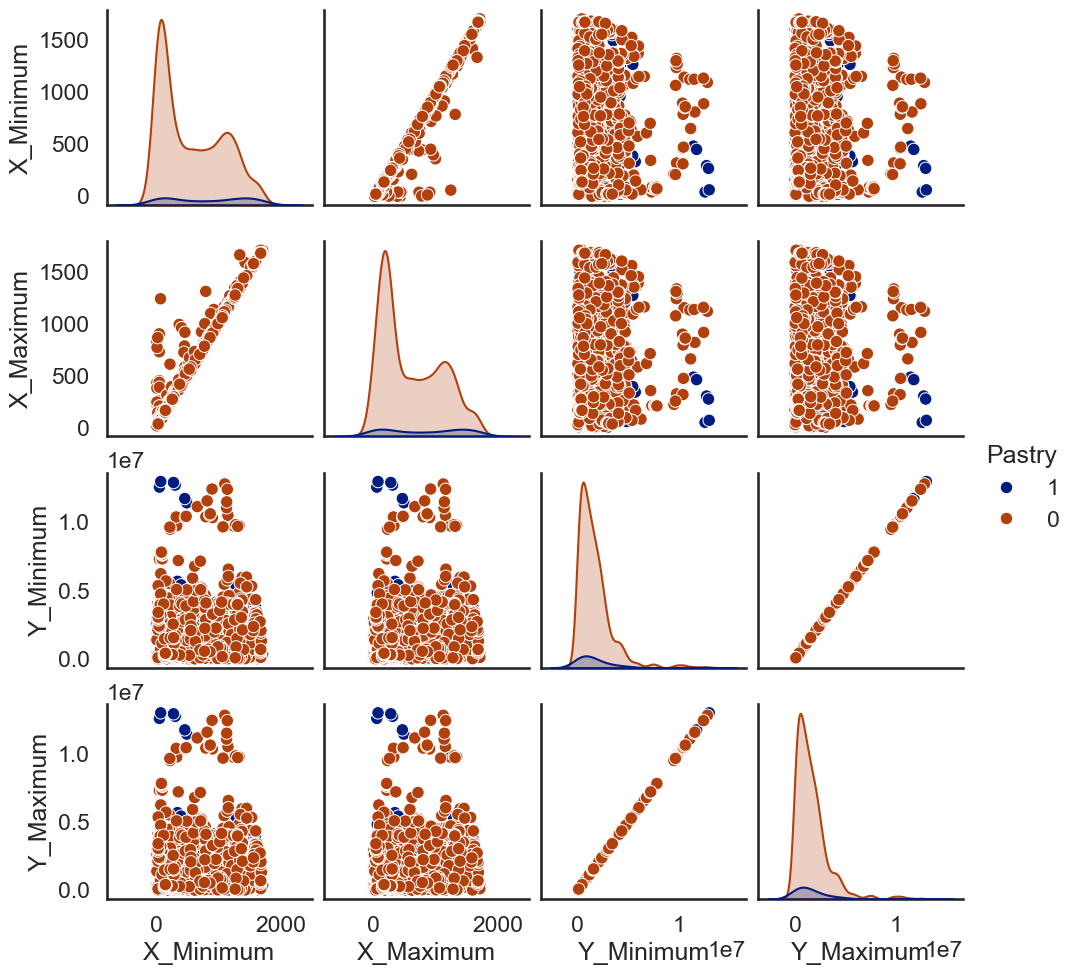

In [32]:
# let's try the pastry to location
locationf['Pastry'] = targets["Pastry"]
sns.pairplot(locationf, hue='Pastry', hue_order=[1,0])
locationf.drop('Pastry',axis=1,inplace=True)

- Given the pastry has less data of true (the values have 1), this shows the data most dominant color. But this
  plot shows pastry cannot be determined by the fields that fall to the location category. We can see some strong correlated plot of min and max (regardless (x or y) because realistically true at nature but still doesn't the variables we need to identify the fault 
- ### We can say that The target Fault 'Pastry' can't Be Determined By the fault's Location

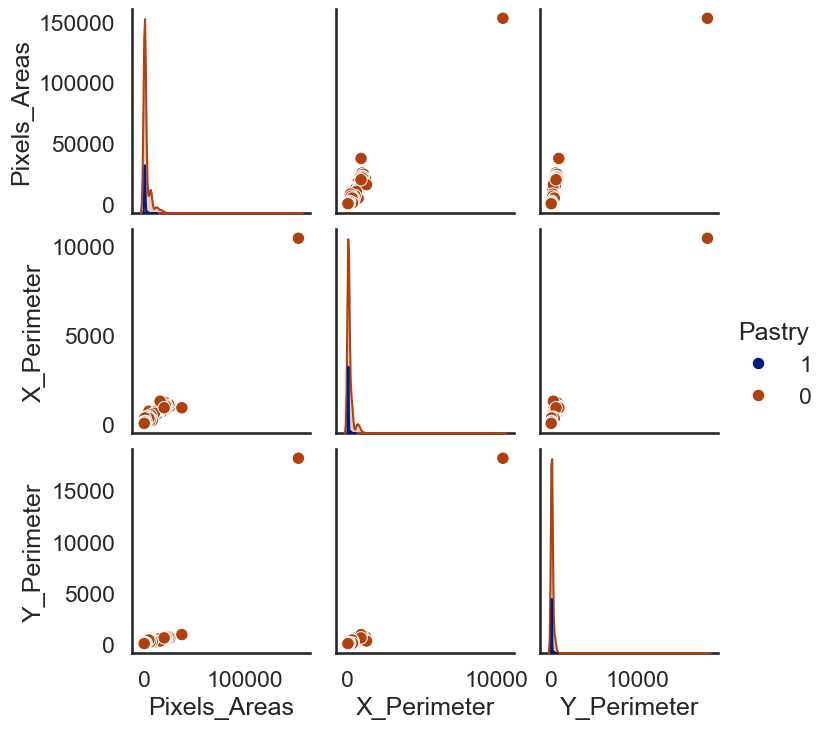

In [33]:
# let's try the pastry to Size
sizef['Pastry'] = targets["Pastry"]
sns.pairplot(sizef, hue='Pastry', hue_order=[1,0])
sizef.drop('Pastry',axis=1,inplace=True)

- ### This also shows that we can't Identify Pastry through faults' size 

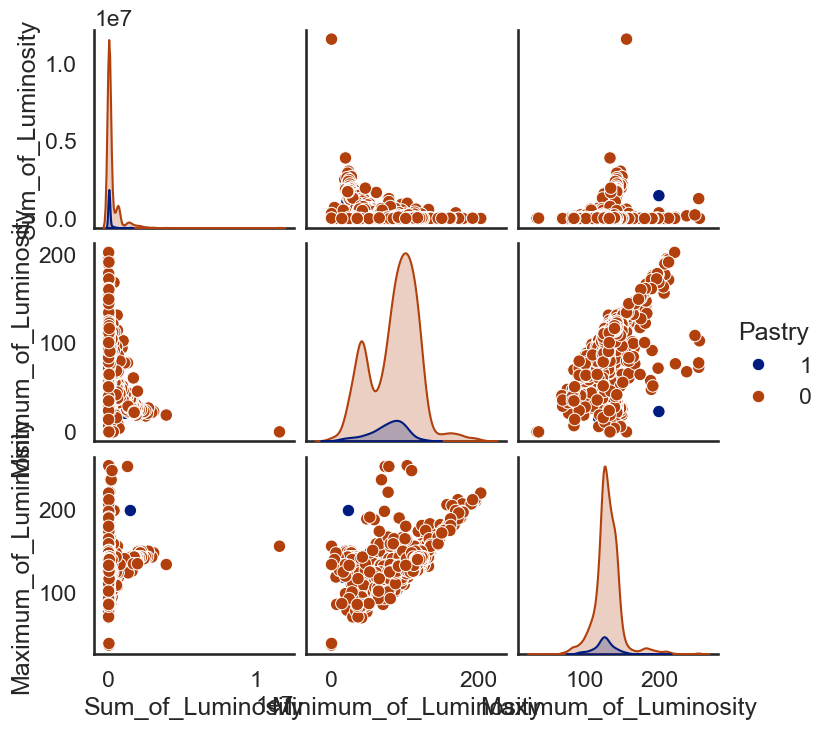

In [34]:
# let's try the pastry to Luminosity
lightf['Pastry'] = targets["Pastry"]
sns.pairplot(lightf, hue='Pastry', hue_order=[1,0])
lightf.drop('Pastry',axis=1,inplace=True)

- Minimum and maximum luminosity can be used to identify Pastry but groupimg them can cause low accuracy
- ### Minimum luminosity and Maximum luminosity can by majority but not accurate.

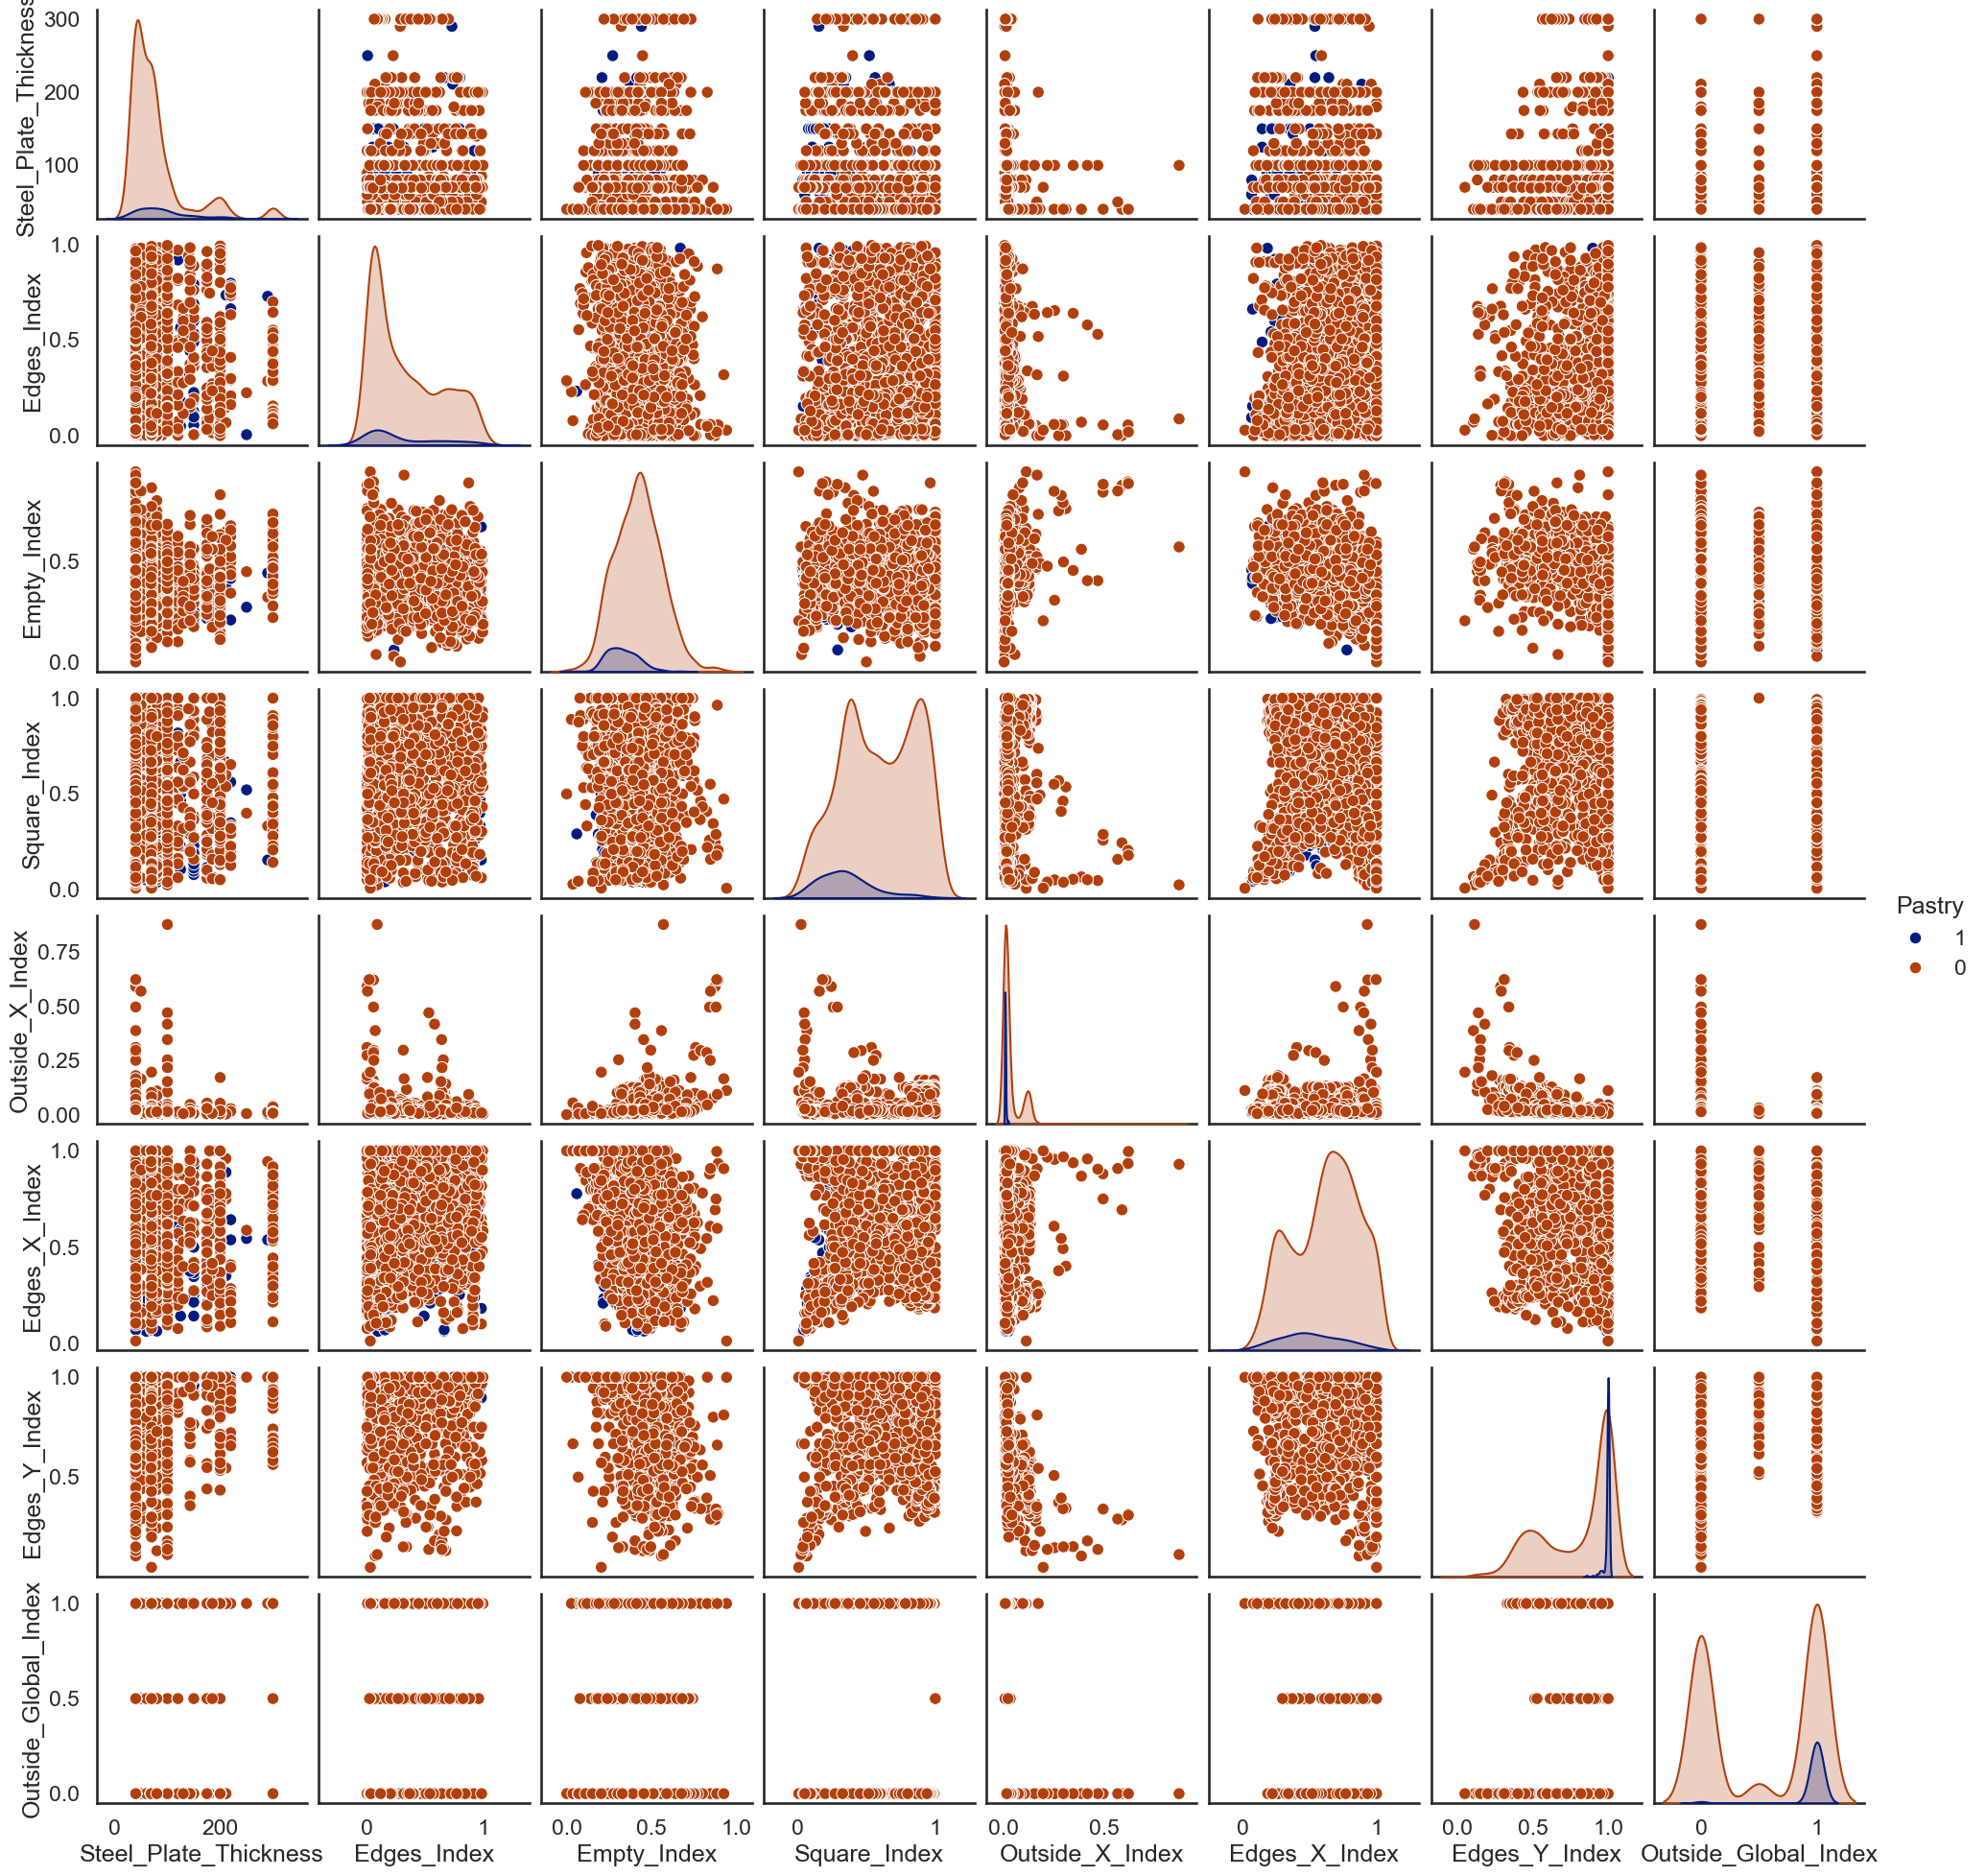

In [35]:
# let's try the pastry to Metal's Feature
features['Pastry'] = targets["Pastry"]
sns.pairplot(features, hue='Pastry', hue_order=[1,0])
features.drop('Pastry',axis=1,inplace=True)

- The fields in features of the metal results to a majority random correlations
- ### Suggests we can't Identify "Pastry" target in the Metals' feature

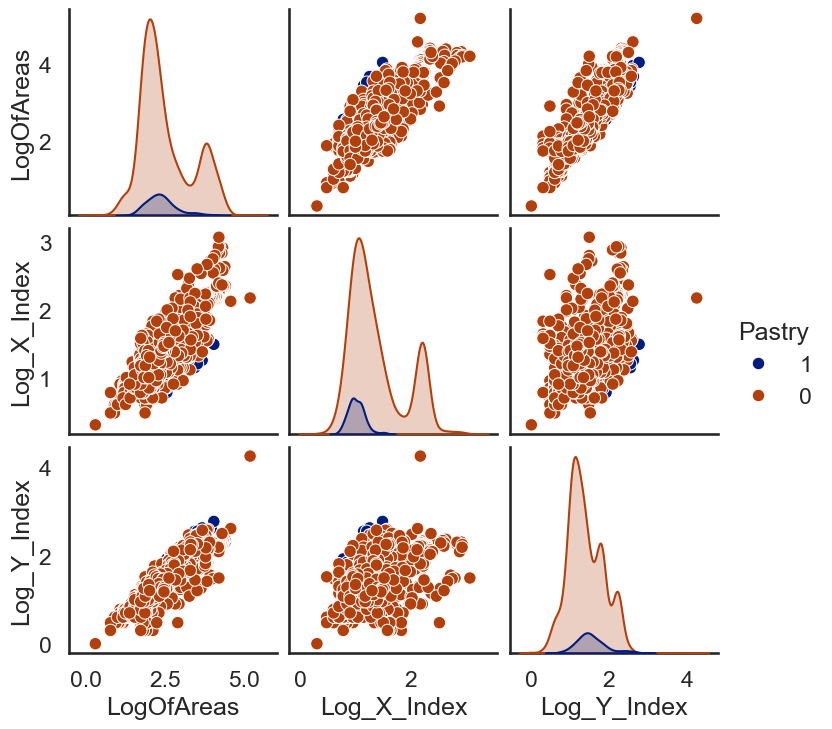

In [36]:
# let's try the pastry to logarithmic features
logarithmic['Pastry'] = targets["Pastry"]
sns.pairplot(logarithmic, hue='Pastry', hue_order=[1,0])
logarithmic.drop('Pastry',axis=1,inplace=True)

- I think this is the same case as for the Luminosity values
- ### Logarithmic Values can be used but not accurate

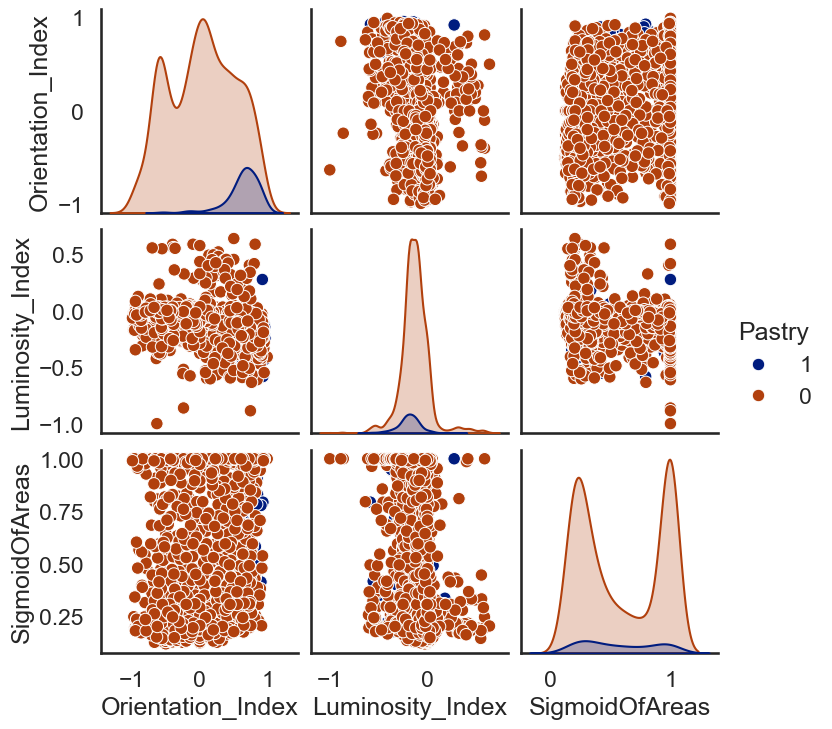

In [37]:
# let's try the pastry to Other features
others['Pastry'] = targets["Pastry"]
sns.pairplot(others, hue='Pastry', hue_order=[1,0])
others.drop('Pastry',axis=1,inplace=True)

- ### Randomly correlated, no way we can identify 'Pastry' Target to these

## Pastry Target Findings:
- Minimum luminosity, Maximum luminosity, LogOfAreas, Log_X_Index, Log_Y_Index are the variables can identify 'Pastry' target but not accurately since in the groupings, data overlaps to each other

Lets try testing in target 'bumps'

# Bumps Target

- Well, the first target testing already told us a pattern to start

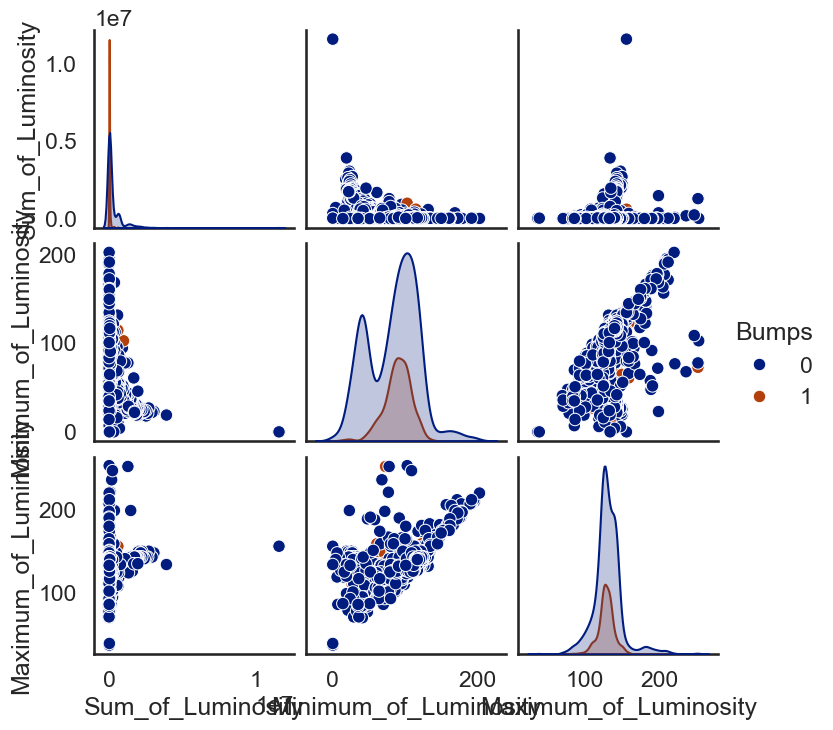

In [47]:
# let's try the Bumps to Luminosity
lightf['Bumps'] = targets["Bumps"]
sns.pairplot(lightf, hue='Bumps')
lightf.drop('Bumps',axis=1,inplace=True)

- as we follow the pattern, this we can say we can have a model with this but can be not accurate.

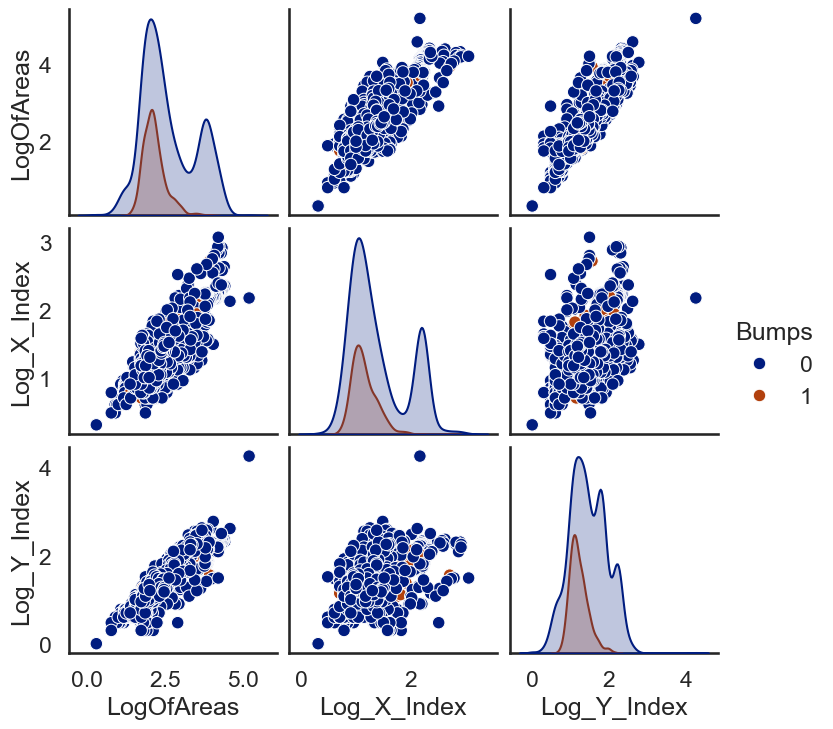

In [57]:
# let's try the Bumps to logarithmic features
logarithmic['Bumps'] = targets["Bumps"]
sns.pairplot(logarithmic, hue='Bumps')
logarithmic.drop('Bumps',axis=1,inplace=True)

- To the final model we just need to include this variables.

# Final Dataset

In [58]:
fdf = fdf.loc[:,['Minimum_of_Luminosity','Maximum_of_Luminosity','LogOfAreas','Log_X_Index','Log_Y_Index']]
fdf

Minimum_of_Luminosity  Maximum_of_Luminosity  LogOfAreas  Log_X_Index  \
0                        76                    108      2.4265       0.9031   
1                        84                    123      2.0334       0.7782   
2                        99                    125      1.8513       0.7782   
3                        99                    126      2.2455       0.8451   
4                        37                    126      3.3818       1.2305   
...                     ...                    ...         ...          ...   
1936                    119                    141      2.4362       1.4472   
1937                    112                    133      2.4579       1.4914   
1938                    120                    140      2.4654       1.4624   
1939                    117                    140      2.6222       1.5185   
1940                    101                    133      2.0128       1.3010   

      Log_Y_Index  
0          1.6435  
1          1.4624  
2          1.2553  
3          1.6532  
4          2.4099  
...           ...  
1936       1.2041  
1937       1.2305  
1938       1.1761  
1939       1.4914  
1940       1.2041  

[1941 rows x 5 columns]

-This include all of the features that has acceptable correlation.

Text(0.5, 1.0, 'Relationship between Selected Features')

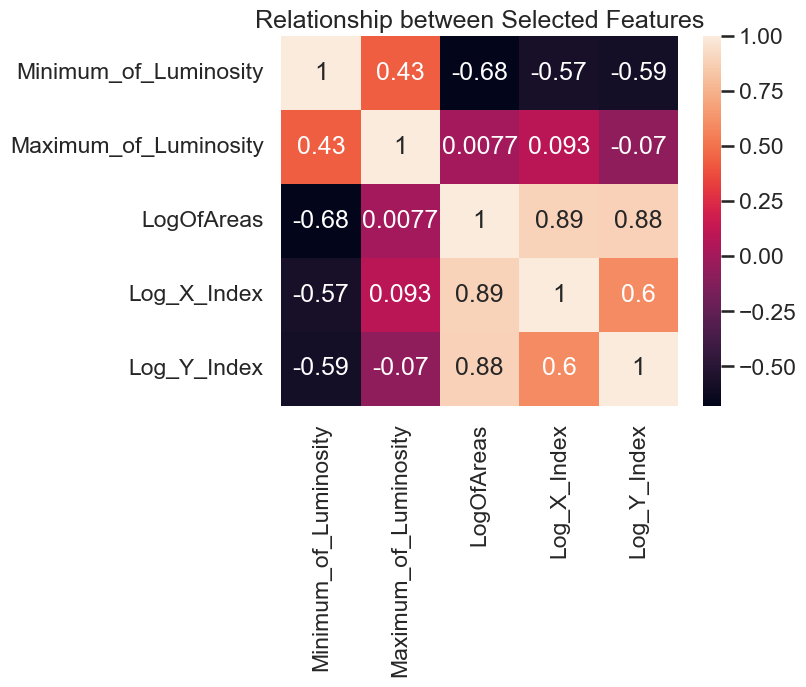

In [64]:
sns.heatmap(fdf.corr(),annot=True)
plt.title("Relationship between Selected Features")

- This heatmap shows that LogOfAreas has high correlation coeficient that is also true given the relationship 
is about the variables makes up the hole gogarithmic of an area. It is also a treat to see that the minimum luminosity and
Logarithmic of area has some correlation. Since 0.60 is considered High correlation, it suggest that if the LogOfArea
increases or decreseas, the minimum Luminosity will do the opposite.

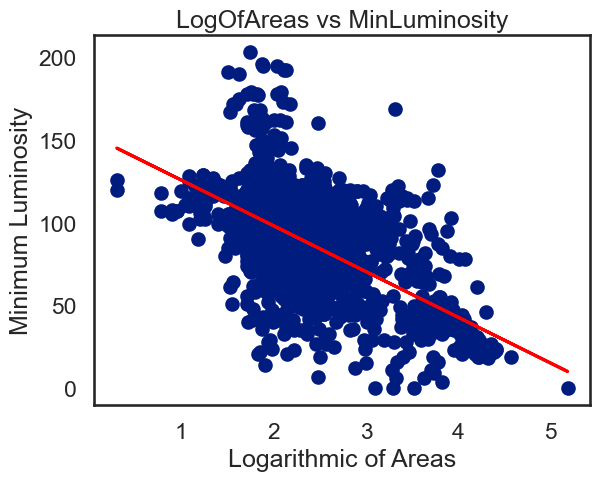

In [92]:
ax = plt.axes()
ax.scatter(data=fdf,x='LogOfAreas',y="Minimum_of_Luminosity")
ax.set(
    xlabel='Logarithmic of Areas',
    ylabel='Minimum Luminosity',
    title='LogOfAreas vs MinLuminosity'
)

# Line of best Fit
coefficients = np.polyfit(fdf.LogOfAreas, fdf.Minimum_of_Luminosity, 1)
poly = np.poly1d(coefficients)
ax.plot(fdf.LogOfAreas, poly(fdf.LogOfAreas), color='red')

- This scatterplot just prove there relationship,
- ## if the Logarithmic of Areas increases, the Luminousity decreases

Conlusion:

- Machine Learning doesn't happen in an instant. If we want a reliable model that works accurately, we need first data from a reliable source, we need to apply data wrangling and we need to observe the data if we applied data enginnering to your dataset, before it will become a machine learning model. Machine learning is a concept that requires a lots of work but very fulfilling to done an accurate and working one.

In [94]:
# Created by Villamor, Kurt Russel (DaBloat)